# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** MUHAMMAD FAKHRI ROBBANI
- **Email:** mfakhrirobbani121@gmail.com
- **ID Dicoding:** m_fakhri_robbani

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
- Produk apa yang paling banyak dan paling sedikit terjual?
- Bagaimana demografi pelanggan yang kita miliki?
- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import calendar

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/fakhri027/submission/refs/heads/main/submission/data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geolocation_df = pd.read_csv("https://raw.githubusercontent.com/fakhri027/submission/refs/heads/main/submission/data/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_items_df = pd.read_csv("https://raw.githubusercontent.com/fakhri027/submission/refs/heads/main/submission/data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_payments_df = pd.read_csv("https://raw.githubusercontent.com/fakhri027/submission/refs/heads/main/submission/data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_reviews_df = pd.read_csv("https://raw.githubusercontent.com/fakhri027/submission/refs/heads/main/submission/data/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/fakhri027/submission/refs/heads/main/submission/data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
product_category_df = pd.read_csv("https://raw.githubusercontent.com/fakhri027/submission/refs/heads/main/submission/data/product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
products_df = pd.read_csv("https://raw.githubusercontent.com/fakhri027/submission/refs/heads/main/submission/data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers_df = pd.read_csv("https://raw.githubusercontent.com/fakhri027/submission/refs/heads/main/submission/data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Terdapat 9 data dalam bentuk csv pada suatu e-commerce di brazil yang didapatkan melalui platform open souce kaggle
- Data ini berkisar dari tahun 2016 september sampai dengan tahun 2018 agustus
- Data agar lebih mudah digunakan telah dipindahkan ke github publik untuk memudahkan akses penggunaan

### Assessing Data

In [11]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [14]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [15]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [16]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [17]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [18]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [19]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())
order_payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [20]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [21]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [22]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())
order_reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [23]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [24]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [25]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [26]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [27]:
print("Jumlah duplikasi: ", product_category_df.duplicated().sum())
product_category_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [28]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [29]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [30]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [31]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [32]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- Data yang memiliki duplikasi hanya ada pada data geolocation_df
- Data yang memiliki *missing value* adalah order_reviews_df, orders_df, dan product_df
- Data yang memiliki *type data inaccurate* adalah order_items_df, order_reviews_df, products_df

### Cleaning Data

In [33]:
geolocation_df.duplicated().sum()

261831

In [34]:
geolocation_df.drop_duplicates(inplace=True)

In [35]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


In [36]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [37]:
order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"])



In [38]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [39]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [40]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [41]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [42]:
order_reviews_df.review_comment_title.value_counts()

,count
review_comment_title,
Recomendo,423
recomendo,345
Bom,293
super recomendo,270
Excelente,248
...,...
Luminaria sobrepor led 18,1
Não recebi.,1
produto com lacre violado,1


In [43]:
order_reviews_df.review_comment_title.fillna(value="No title", inplace=True)

<ipython-input-43-bafd8921ee22>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews_df.review_comment_title.fillna(value="No title", inplace=True)


In [44]:
order_reviews_df.review_comment_message.fillna(value="No message", inplace=True)

<ipython-input-44-710e8bea1950>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews_df.review_comment_message.fillna(value="No message", inplace=True)


In [45]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


In [46]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [47]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [48]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [49]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [50]:
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [51]:
orders_df.dropna(axis=0, inplace=True)

In [52]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [53]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [54]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [55]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [56]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [57]:
products_df[products_df.product_height_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
products_df.dropna(axis=0, inplace=True)

In [59]:
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


In [60]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [61]:
integers_columns = ["product_name_lenght", "product_description_lenght", "product_photos_qty"]

for column in integers_columns:
  products_df[column] = products_df[column].astype(int)

In [62]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  int64  
 3   product_description_lenght  32340 non-null  int64  
 4   product_photos_qty          32340 non-null  int64  
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 2.5+ MB


**Insight:**
- Semua data yang terduplikasi sudah disesuaikan dengan menghapus data tersebut
- Semua tipe data yang belum sesuai sudah disesuaikan dengan menggantinya ke tipe data datetime dan integer menyesuaikan konteks
- Semua data yang *missing value* telah disesuaikan dengan menggunakan imputation sesuai konteksnya atau menghapusnya tergantung kebutuhan bisnis dan tujuan
- tidak ditemukannya *value inaccurate*

## Exploratory Data Analysis (EDA)

### Explore All Data Frame

In [63]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [64]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [65]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


In [66]:
geolocation_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


In [67]:
geolocation_df.groupby(by="geolocation_state").geolocation_city.nunique().sort_values(ascending=False)

,geolocation_city
geolocation_state,
MG,1426
SP,1048
RS,691
BA,652
PR,651
SC,420
GO,384
MA,299
PI,278


In [68]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [69]:
order_items_df.sort_values(by="price", ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34
...,...,...,...,...,...,...,...
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23


In [70]:
order_items_df.groupby(by="order_item_id").agg({
    "product_id": "nunique",
    "price": ["max", "min", "mean", "std"],
    "freight_value": ["max", "min", "mean", "std"]
})

product_id    price                               freight_value  \
                 nunique      max   min        mean         std           max   
order_item_id                                                                   
1                  31881  6735.00  0.85  125.964327  191.375106        409.68   
2                   6089  2299.95  0.85   85.456052  106.398657        299.16   
3                   1763  1790.00  1.20   78.004534  102.512099        299.16   
4                    809  1790.00  1.20   77.243161  109.690934        299.16   
5                    393  1680.00  1.20   75.561978  112.195068        299.16   
6                    231  1680.00  1.20   76.165508  131.322562        299.16   
7                     58  1680.00  1.20  100.711897  218.494980         88.57   
8                     35  1680.00  1.20  120.766944  274.289985         88.57   
9                     28   284.99  1.20   80.356071   62.481293         88.57   
10                    25   284.99  1.20   81.569200   62.067878         40.69   
11                    17   179.99  1.20   60.147059   45.643951         76.50   
12                    13   108.00  1.20   51.059231   37.345170         24.02   
13                     8   100.00  1.20   54.421250   34.266791         16.22   
14                     7   100.00  1.20   57.911429   35.443230         16.22   
15                     5   100.00  1.20   63.278000   40.658774         16.22   
16                     3   100.00  1.20   66.633333   56.670657         14.44   
17                     3   100.00  1.20   66.633333   56.670657         14.44   
18                     3   100.00  1.20   66.633333   56.670657         14.44   
19                     3   100.00  1.20   66.633333   56.670657         14.44   
20                     3   100.00  1.20   66.633333   56.670657         14.44   
21                     1     7.80  7.80    7.800000         NaN          6.57   

                                           
                min       mean        std  
order_item_id                              
1              0.00  20.201927  15.909873  
2              0.00  18.537902  14.239990  
3              0.00  18.230691  14.970139  
4              0.00  18.746197  16.352825  
5              0.00  18.537935  19.391497  
6              0.03  19.356016  24.364799  
7              0.14  19.026724  16.574512  
8              0.15  22.254167  20.752651  
9              0.14  19.587143  18.242627  
10             0.08  15.886400  11.835903  
11             1.20  17.399412  16.802555  
12             1.20  12.199231   5.724445  
13             1.20   9.808750   4.833237  
14             1.20  10.154286   5.112651  
15             1.20   9.974000   5.922523  
16             7.89  10.816667   3.330110  
17             7.89  10.816667   3.330110  
18             7.89  10.816667   3.330110  
19             7.89  10.816667   3.330110  
20             7.89  10.816667   3.330110  
21             6.57   6.570000        NaN

In [71]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [72]:
order_payments_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_installments": ["max", "min", "mean", "std"],
    "payment_value": ["max", "min", "mean", "std", "sum"]
})

order_id payment_installments                         \
              nunique                  max min      mean      std   
payment_type                                                        
boleto          19784                    1   1  1.000000  0.00000   
credit_card     76505                   24   0  3.507155  2.85099   
debit_card       1528                    1   1  1.000000  0.00000   
not_defined         3                    1   1  1.000000  0.00000   
voucher          3866                    1   1  1.000000  0.00000   

             payment_value                                              
                       max    min        mean         std          sum  
payment_type                                                            
boleto             7274.88  11.62  145.034435  213.581061   2869361.27  
credit_card       13664.08   0.01  163.319021  222.119311  12542084.19  
debit_card         4445.50  13.38  142.570170  245.793401    217989.79  
not_defined           0.00   0.00    0.000000    0.000000         0.00  
voucher            3184.34   0.00   65.703354  115.519185    379436.87

In [73]:
payment_type_counts = order_payments_df.groupby(by="payment_type").agg({
    "order_id": "nunique"
}).reset_index()
payment_type_counts.rename(columns={"order_id": "transaction_count"}, inplace=True)

total_transactions = payment_type_counts["transaction_count"].sum()

for index, row in payment_type_counts.iterrows():
    payment_type = row["payment_type"]
    transaction_count = row["transaction_count"]
    percentage = (transaction_count / total_transactions) * 100
    print(f"Percentage of transactions using {payment_type}: {percentage:.2f}%")

Percentage of transactions using boleto: 19.46%
Percentage of transactions using credit_card: 75.24%
Percentage of transactions using debit_card: 1.50%
Percentage of transactions using not_defined: 0.00%
Percentage of transactions using voucher: 3.80%


In [74]:
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,No title,No message,NaN,NaN
freq,3,3,NaN,87656,58247,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


In [75]:
order_reviews_df.groupby(by="review_score").order_id.nunique().sort_values(ascending=False)

,order_id
review_score,
5,57076
4,19098
1,11393
3,8160
2,3148


In [76]:
review_score_counts = order_reviews_df.groupby(by="review_score").order_id.nunique().sort_values(ascending=False)

total_orders = order_reviews_df['order_id'].nunique()

review_score_percentages = (review_score_counts / total_orders) * 100

print(review_score_percentages)

review_score
5    57.843584
4    19.354839
1    11.546218
3     8.269739
2     3.190336
Name: order_id, dtype: float64


In [77]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96461,96461,96461,96461,96461,96461,96461,96461
unique,96461,96461,2,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96455,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 23:53:26.642249216,2018-01-02 10:10:06.480142336,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,2018-01-25 17:33:14.236012544
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
25%,NaN,NaN,NaN,2017-09-14 09:28:28,2017-09-14 14:30:14,2017-09-18 16:52:19,2017-09-25 22:31:59,2017-10-05 00:00:00
50%,NaN,NaN,NaN,2018-01-20 19:59:42,2018-01-22 13:49:00,2018-01-24 16:19:03,2018-02-02 19:50:56,2018-02-16 00:00:00
75%,NaN,NaN,NaN,2018-05-05 18:33:24,2018-05-06 10:30:49,2018-05-08 14:33:00,2018-05-15 23:08:54,2018-05-28 00:00:00
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


In [78]:
orders_df.groupby(by="order_status").order_id.count()

,order_id
order_status,
canceled,6
delivered,96455


In [79]:
product_category_df.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [80]:
product_df = pd.merge(
    left=products_df,
    right=product_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40,287,1,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44,276,1,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46,250,1,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27,261,1,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37,402,4,625.0,20.0,17.0,13.0,housewares


In [81]:
product_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
count,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32327
unique,32340,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3029
mean,NaN,NaN,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596,NaN
std,NaN,NaN,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762,NaN
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000,NaN
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000,NaN


In [82]:
product_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False)

,product_id
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
...,...
tablets_printing_image,9
home_comfort_2,5
fashion_childrens_clothes,5


In [83]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [84]:
sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

,seller_id
seller_state,
SP,1849
PR,349
MG,244
SC,190
RJ,171
RS,129
GO,40
DF,30
ES,23


In [85]:
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
...,...
ivoti,1
itirapina,1
itau de minas,1


In [86]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [87]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15044
1,rio de janeiro,6603
2,belo horizonte,2697
3,brasilia,2071
4,curitiba,1489
5,campinas,1406
6,porto alegre,1341
7,salvador,1188
8,guarulhos,1143
9,sao bernardo do campo,911


In [88]:
order_item_payments_df = pd.merge(
    left=order_items_df,
    right=order_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_item_payments_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04


In [89]:
order_data_df = pd.merge(
    left=order_item_payments_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_data_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,No title,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,No title,No message,2017-05-13,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,No title,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,No title,No message,2018-08-15,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,No title,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59


In [90]:
order_data_products_df = pd.merge(
    left=order_data_df,
    right=product_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
order_data_products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,2017-09-22 10:57:03,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,2017-05-15 11:34:13,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,2018-01-23 16:06:31,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,2018-08-15 16:39:01,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,2017-03-03 10:54:59,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [91]:
order_with_seller_df = pd.merge(
    left=order_data_products_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
order_with_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,480.0,1.0,200.0,16.0,10.0,15.0,perfumery,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools,87900,loanda,PR


In [92]:
all_df = pd.merge(
    left=order_with_seller_df,
    right=orders_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952.0,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP


In [93]:
all_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,118310,118310.000000,118310,118310,118310,118310.000000,118310.000000,118307.000000,118307,118307.000000,...,115706,115706,115706,115706,115706,115706,115706,115706.000000,115706,115706
unique,98666,NaN,32951,3095,NaN,NaN,NaN,NaN,4,NaN,...,2,NaN,NaN,NaN,NaN,NaN,93342,NaN,4085,27
top,895ab968e7bb0d5659d16cd74cd1650c,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,NaN,NaN,NaN,NaN,credit_card,NaN,...,delivered,NaN,NaN,NaN,NaN,NaN,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP
freq,63,NaN,536,2155,NaN,NaN,NaN,NaN,87258,NaN,...,115699,NaN,NaN,NaN,NaN,NaN,75,NaN,18299,48805
mean,NaN,1.196543,NaN,NaN,2018-01-05 22:06:13.308807680,120.646603,20.032387,1.094069,NaN,2.943317,...,NaN,2017-12-31 10:13:41.211380480,2017-12-31 20:39:35.555952128,2018-01-03 17:05:20.273615616,2018-01-12 21:55:52.675513856,2018-01-24 06:20:48.142706432,NaN,35080.148272,NaN,NaN
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000,1.000000,NaN,0.000000,...,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,NaN,1003.000000,NaN,NaN
25%,NaN,1.000000,NaN,NaN,2017-09-18 14:30:33,39.900000,13.080000,1.000000,NaN,1.000000,...,NaN,2017-09-12 18:23:45,2017-09-13 03:35:20.249999872,2017-09-15 00:01:20.249999872,2017-09-22 23:26:56.249999872,2017-10-04 00:00:00,NaN,11310.000000,NaN,NaN
50%,NaN,1.000000,NaN,NaN,2018-01-25 04:11:15.500000,74.900000,16.280000,1.000000,NaN,2.000000,...,NaN,2018-01-18 22:10:16,2018-01-19 10:24:28,2018-01-23 17:43:01,2018-02-01 12:25:55.500000,2018-02-15 00:00:00,NaN,24320.000000,NaN,NaN
75%,NaN,1.000000,NaN,NaN,2018-05-10 02:51:40.249999872,134.900000,21.180000,1.000000,NaN,4.000000,...,NaN,2018-05-04 10:26:52,2018-05-04 16:34:15,2018-05-07 16:31:00,2018-05-15 00:26:10.750000128,2018-05-25 00:00:00,NaN,58806.250000,NaN,NaN
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000,29.000000,NaN,24.000000,...,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,NaN,99980.000000,NaN,NaN


In [94]:
all_df.groupby(by=["customer_state", "product_category_name_english"]).agg({
    "order_id": "nunique",
    "payment_value": ["sum", "mean"]
}).sort_values(by=("order_id", "nunique"), ascending=False)

order_id payment_value  \
                                                  nunique           sum   
customer_state product_category_name_english                              
SP             bed_bath_table                        4347     776483.60   
               health_beauty                         3716     606189.79   
               sports_leisure                        3214     511293.14   
               housewares                            2720     436571.43   
               furniture_decor                       2663     538195.33   
...                                                   ...           ...   
PA             audio                                    1        608.67   
               books_imported                           1        337.44   
               christmas_supplies                       1       5589.72   
AP             consoles_games                           1        137.27   
GO             furniture_mattress_and_upholstery        1        147.41   

                                                              
                                                        mean  
customer_state product_category_name_english                  
SP             bed_bath_table                     139.254591  
               health_beauty                      142.097935  
               sports_leisure                     136.782541  
               housewares                         129.048605  
               furniture_decor                    145.497521  
...                                                      ...  
PA             audio                              608.670000  
               books_imported                     168.720000  
               christmas_supplies                 931.620000  
AP             consoles_games                     137.270000  
GO             furniture_mattress_and_upholstery  147.410000  

[1351 rows x 3 columns]

In [95]:
all_df.groupby(by=["seller_state", "product_category_name_english"]).agg({
    "order_id": "nunique",
    "payment_value": ["sum", "mean"]
}).sort_values(by=("order_id", "nunique"), ascending=False)

order_id payment_value            
                                            nunique           sum        mean
seller_state product_category_name_english                                   
SP           bed_bath_table                    8336    1532090.56  145.015671
             health_beauty                     5820     961172.43  144.515476
             sports_leisure                    4902     850013.15  149.203642
             furniture_decor                   4688    1067113.91  161.683926
             watches_gifts                     4588    1109003.21  221.269595
...                                             ...           ...         ...
GO           stationery                           1        127.67  127.670000
             toys                                 1        111.14  111.140000
MG           arts_and_craftmanship                1         33.69   33.690000
             audio                                1        160.21  160.210000
AC           books_technical                      1        299.84  299.840000

[501 rows x 3 columns]

In [96]:
all_df.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "order_id": "nunique",
    "payment_value": ["sum", "mean"]
}).sort_values(by=("order_id", "nunique"), ascending=False)

order_id payment_value            
                                             nunique           sum        mean
customer_city product_category_name_english                                   
sao paulo     bed_bath_table                    1623     295231.34  136.491604
              health_beauty                     1501     258953.56  146.301446
              sports_leisure                    1229     188500.83  131.911008
              housewares                        1083     164776.64  119.924774
              computers_accessories              980     282612.40  229.953133
...                                              ...           ...         ...
irai          computers_accessories                1         36.01   36.010000
iracemapolis  toys                                 1        102.03  102.030000
              telephony                            1         25.83   25.830000
              stationery                           1         62.01   62.010000
zortea        computers_accessories                1         90.88   90.880000

[24891 rows x 3 columns]

In [97]:
all_df.groupby(by=["customer_state"]).agg({
    "order_id": "nunique",
    "payment_value": ["sum", "mean"]
}).sort_values(by=("payment_value","sum"), ascending=False)

order_id payment_value            
                nunique           sum        mean
customer_state                                   
SP                40489    7454745.74  152.754923
RJ                12351    2699684.00  180.423979
MG                11352    2290209.77  169.720600
RS                 5342    1117696.39  173.879339
PR                 4923    1036003.69  175.772598
BA                 3256     775836.28  196.414248
SC                 3547     769388.01  181.459436
GO                 1957     497367.84  207.669244
DF                 2080     424872.44  173.629931
ES                 1995     399308.36  172.264176
PE                 1593     362434.77  196.975418
CE                 1278     334911.36  222.828583
PA                  946     255609.57  233.007812
MT                  886     251859.09  232.771802
MA                  716     195421.50  237.739051
PB                  517     177485.32  284.431603
MS                  701     164556.97  194.053031
PI                  476     133729.03  241.388141
RN                  474     115203.08  204.623588
AL                  397     108727.76  244.332045
SE                  335      85694.32  222.006010
TO                  274      70934.12  212.377605
RO                  243      65200.66  232.030819
AM                  145      34586.18  203.448118
AC                   80      24890.49  264.792447
AP                   67      21521.71  259.297711
RR                   41      11300.88  245.671304

**Insight:**
- Customer terbanyak berasal dari negara bagian SP dengan jumlah 41746
- Customer terbanyak berasal dari kota Sao Paulo dengan jumlah 15540
- Negara bagian terbanyak melakukan transaksi adalah SP dengan jumlah 40489 transaksi
- Kota terbanyak melakukan transaksi adalah Sao Paulo dengan jumlah 15044 transaksi
- Transaksi terbanyak menggunakan Credit sebanyak 76505 (75% dari keseluruhan transaksi)
- Negara bagian terbanyak memberikan revenue adalah SP dengan jumlah 7454745.74 RBL

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?

In [98]:
all_df['order_purchase_year'] = all_df['order_purchase_timestamp'].dt.year
all_df['order_purchase_month'] = all_df['order_purchase_timestamp'].dt.month_name()

monthly_orders_df = all_df.groupby(['order_purchase_year', 'order_purchase_month'])['order_id'].count().reset_index()
monthly_revenue_df = all_df.groupby(['order_purchase_year', 'order_purchase_month'])['payment_value'].sum().reset_index()
monthly_orders_df = pd.merge(monthly_orders_df, monthly_revenue_df, on=['order_purchase_year', 'order_purchase_month'])

monthly_orders_df.rename(columns={
    'order_purchase_year': 'Year',
    'order_purchase_month': 'Month',
    'order_id': 'Transaction_Count',
    'payment_value': 'Revenue'
}, inplace=True)

monthly_orders_df['Month_Number'] = monthly_orders_df['Month'].apply(lambda x: list(calendar.month_name).index(x))
monthly_orders_df.sort_values(['Year', 'Month_Number'], inplace=True)
monthly_orders_df.drop(columns=['Month_Number'], inplace=True)

monthly_orders_df

,Year,Month,Transaction_Count,Revenue
2,2016.0,September,3,0.00
1,2016.0,October,340,63030.53
0,2016.0,December,1,19.62
7,2017.0,January,979,178167.17
6,2017.0,February,1960,325962.15
10,2017.0,March,3098,508767.44
3,2017.0,April,2715,457050.31
11,2017.0,May,4307,706848.90
9,2017.0,June,3727,590223.90
8,2017.0,July,4771,720446.68


In [99]:
yearly_data = monthly_orders_df.groupby('Year').agg({'Revenue': 'sum', 'Transaction_Count': 'sum'}).reset_index()
print(yearly_data)

for year, data in yearly_data.iterrows():
    print(f"Tahun {int(data['Year'])}:")
    print(f"- Total Revenue: {data['Revenue']:.2f} RBL")
    print(f"- Jumlah Order: {data['Transaction_Count']}")
    print("")

total_revenue = yearly_data['Revenue'].sum()
total_orders = yearly_data['Transaction_Count'].sum()

print(f"Total Revenue Keseluruhan: {total_revenue:.2f} RBL")
print(f"Total Order Keseluruhan: {total_orders}")

     Year      Revenue  Transaction_Count
0  2016.0     63050.15                344
1  2017.0   8936669.75              52559
2  2018.0  10879459.43              62803
Tahun 2016:
- Total Revenue: 63050.15 RBL
- Jumlah Order: 344.0

Tahun 2017:
- Total Revenue: 8936669.75 RBL
- Jumlah Order: 52559.0

Tahun 2018:
- Total Revenue: 10879459.43 RBL
- Jumlah Order: 62803.0

Total Revenue Keseluruhan: 19879179.33 RBL
Total Order Keseluruhan: 115706


<ipython-input-100-1aa4cb77fea4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_2016_df['Month'] = pd.Categorical(orders_2016_df['Month'], categories=calendar.month_name[1:], ordered=True)


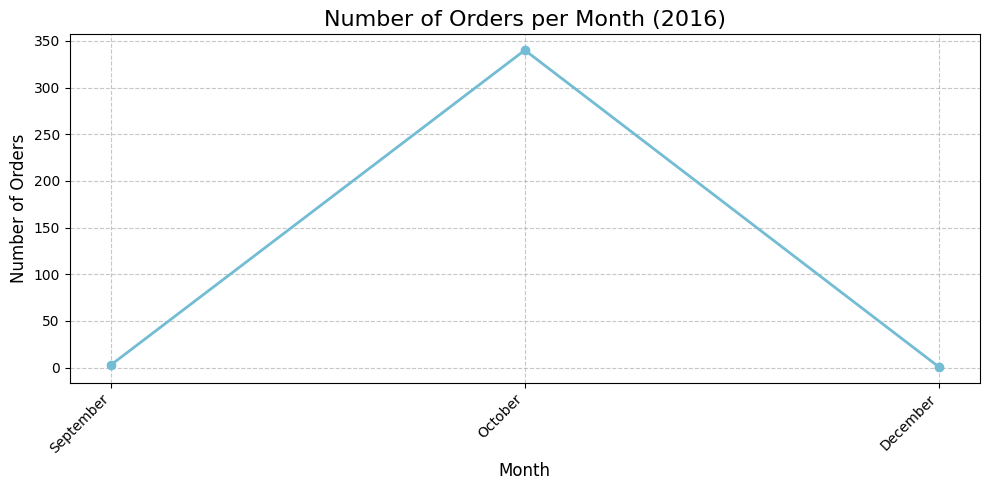

In [100]:
orders_2016_df = monthly_orders_df[monthly_orders_df['Year'] == 2016]
orders_2016_df['Month'] = pd.Categorical(orders_2016_df['Month'], categories=calendar.month_name[1:], ordered=True)

plt.figure(figsize=(10, 5))
plt.plot(orders_2016_df['Month'], orders_2016_df['Transaction_Count'], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Month (2016)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<ipython-input-101-1c93235c0ae5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_2016_df['Month'] = pd.Categorical(revenue_2016_df['Month'], categories=calendar.month_name[1:], ordered=True)


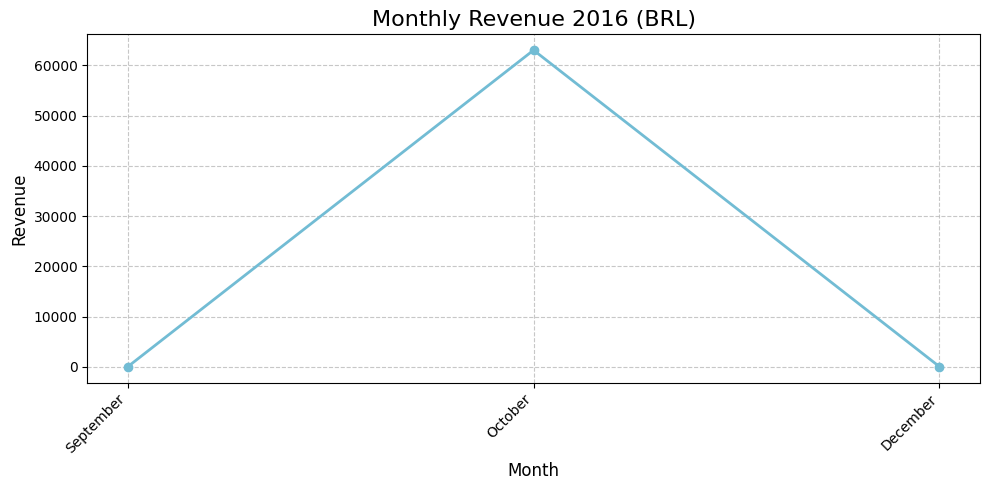

In [101]:
revenue_2016_df = monthly_orders_df[monthly_orders_df['Year'] == 2016]
revenue_2016_df['Month'] = pd.Categorical(revenue_2016_df['Month'], categories=calendar.month_name[1:], ordered=True)

plt.figure(figsize=(10, 5))
plt.plot(revenue_2016_df['Month'], revenue_2016_df['Revenue'], marker='o', linewidth=2, color="#72BCD4")
plt.title("Monthly Revenue 2016 (BRL)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<ipython-input-102-2bfb36ab48d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_2017_df['Month'] = pd.Categorical(orders_2017_df['Month'], categories=calendar.month_name[1:], ordered=True)


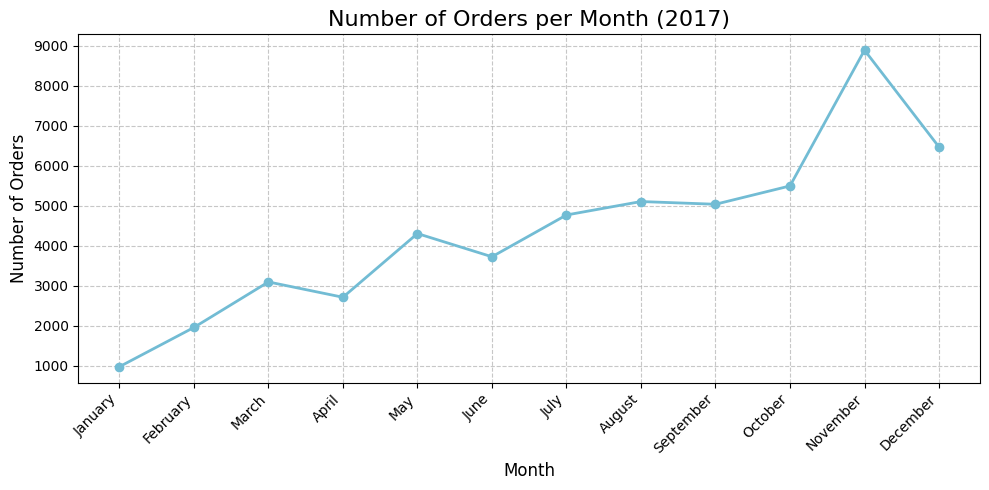

In [102]:
orders_2017_df = monthly_orders_df[monthly_orders_df['Year'] == 2017]
orders_2017_df['Month'] = pd.Categorical(orders_2017_df['Month'], categories=calendar.month_name[1:], ordered=True)

plt.figure(figsize=(10, 5))
plt.plot(orders_2017_df['Month'], orders_2017_df['Transaction_Count'], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Month (2017)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<ipython-input-103-56049dec69a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_2017_df['Month'] = pd.Categorical(revenue_2017_df['Month'], categories=calendar.month_name[1:], ordered=True)


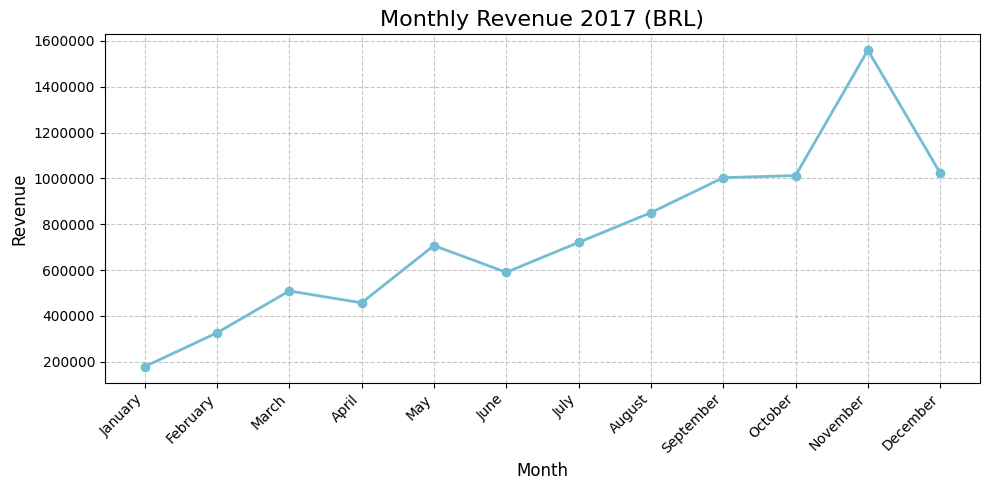

In [103]:
revenue_2017_df = monthly_orders_df[monthly_orders_df['Year'] == 2017]
revenue_2017_df['Month'] = pd.Categorical(revenue_2017_df['Month'], categories=calendar.month_name[1:], ordered=True)

plt.figure(figsize=(10, 5))
plt.plot(revenue_2017_df['Month'], revenue_2017_df['Revenue'], marker='o', linewidth=2, color="#72BCD4")
plt.title("Monthly Revenue 2017 (BRL)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

<ipython-input-104-4e7456bfdc6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_2018_df['Month'] = pd.Categorical(orders_2018_df['Month'], categories=calendar.month_name[1:], ordered=True)


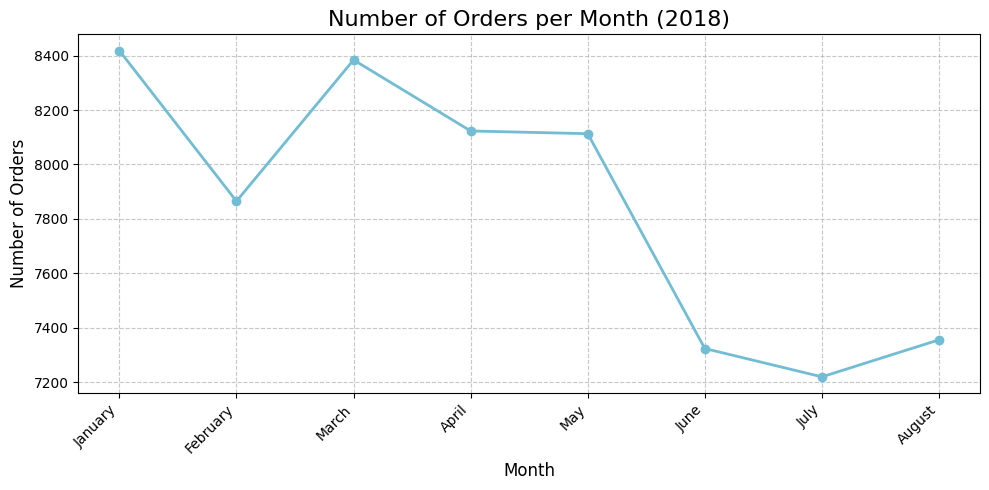

In [104]:
orders_2018_df = monthly_orders_df[monthly_orders_df['Year'] == 2018]
orders_2018_df['Month'] = pd.Categorical(orders_2018_df['Month'], categories=calendar.month_name[1:], ordered=True)

plt.figure(figsize=(10, 5))
plt.plot(orders_2018_df['Month'], orders_2018_df['Transaction_Count'], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Month (2018)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<ipython-input-105-5be4ae475258>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_2018_df['Month'] = pd.Categorical(revenue_2018_df['Month'], categories=calendar.month_name[1:], ordered=True)


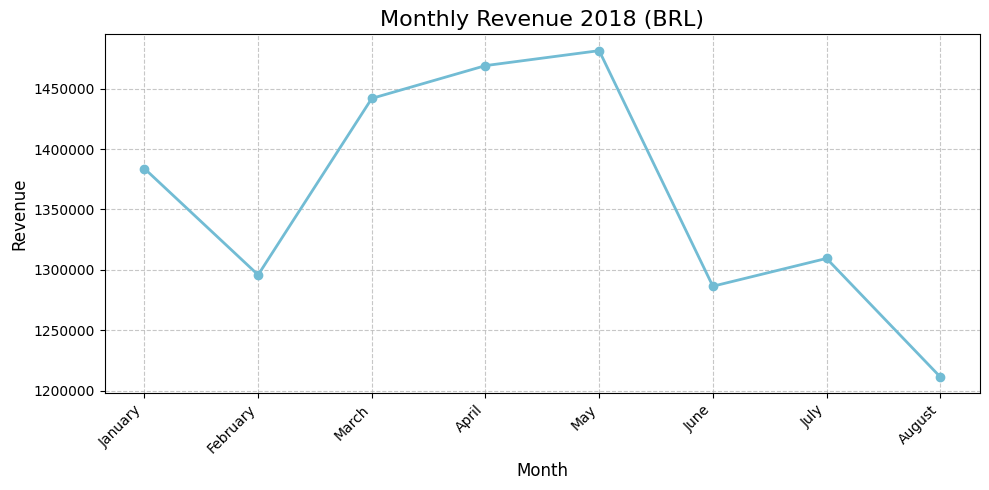

In [105]:
revenue_2018_df = monthly_orders_df[monthly_orders_df['Year'] == 2018]
revenue_2018_df['Month'] = pd.Categorical(revenue_2018_df['Month'], categories=calendar.month_name[1:], ordered=True)

plt.figure(figsize=(10, 5))
plt.plot(revenue_2018_df['Month'], revenue_2018_df['Revenue'], marker='o', linewidth=2, color="#72BCD4")
plt.title("Monthly Revenue 2018 (BRL)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ticklabel_format(style='plain', axis='y') # atau bisa juga dengan 'style='scientific''

plt.tight_layout()
plt.show()

<ipython-input-106-e3ddf16eb107>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_revenue = monthly_orders_df.groupby(['Year', 'Month'])['Revenue'].sum().reset_index()


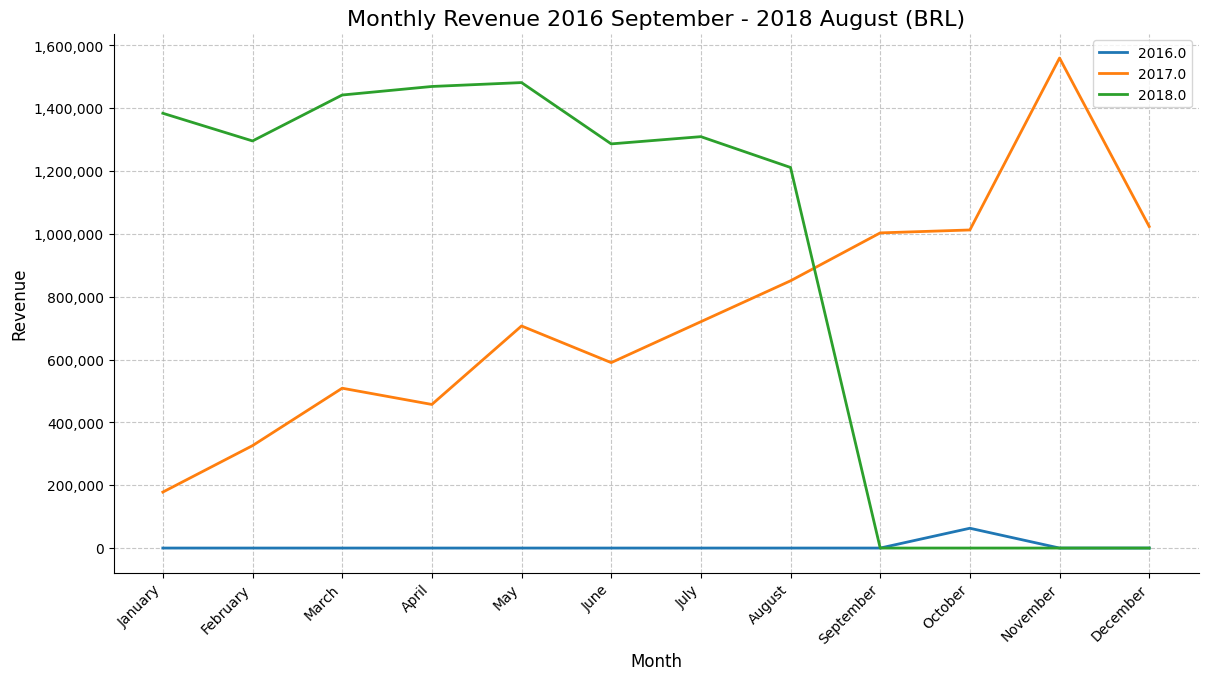

In [106]:
monthly_orders_df['Month'] = pd.Categorical(monthly_orders_df['Month'], categories=calendar.month_name[1:], ordered=True)
monthly_revenue = monthly_orders_df.groupby(['Year', 'Month'])['Revenue'].sum().reset_index()

plt.figure(figsize=(14, 7))
ax = plt.gca()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i, year in enumerate(monthly_revenue['Year'].unique()):
    year_data = monthly_revenue[monthly_revenue['Year'] == year]
    ax.plot(year_data['Month'], year_data['Revenue'], label=year, color=colors[i % len(colors)], linewidth=2)

plt.title('Monthly Revenue 2016 September - 2018 August (BRL)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

### Pertanyaan 2: Produk apa yang paling banyak dan paling sedikit terjual?

In [107]:
sum_order_items_df = all_df.groupby('product_category_name_english')['order_id'].count().reset_index()
sum_order_items_df.rename(columns={
    'product_category_name_english': 'Product Category',
    'order_id': 'Sales Count'
}, inplace=True)

sum_order_items_df = sum_order_items_df.sort_values(by=['Sales Count'], ascending=False)
sum_order_items_df

,Product Category,Sales Count
7,bed_bath_table,11988
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150
...,...,...
3,arts_and_craftmanship,24
52,la_cuisine,16
11,cds_dvds_musicals,14
29,fashion_childrens_clothes,8


<ipython-input-108-c809da29194f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x="Sales Count", y="Product Category", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
<ipython-input-108-c809da29194f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x="Sales Count", y="Product Category", data=sum_order_items_df.sort_values(by="Sales Count", ascending=True).head(5), palette=colors, ax=ax[1])


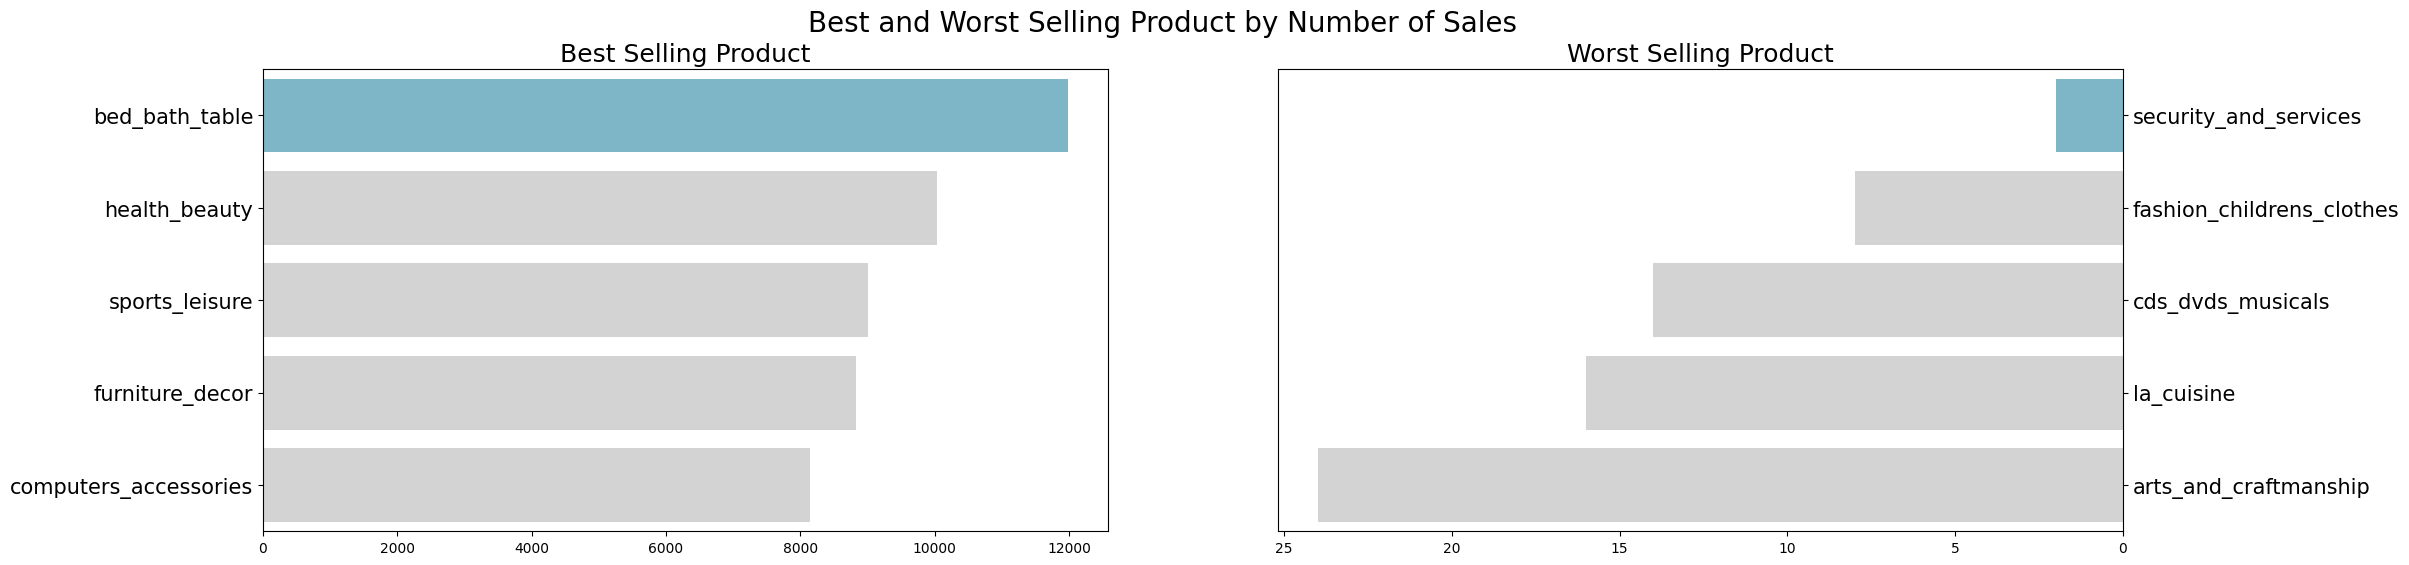

In [108]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sn.barplot(x="Sales Count", y="Product Category", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Selling Product", loc="center", fontsize=18)
ax[0].tick_params(axis='y', labelsize=15)

sn.barplot(x="Sales Count", y="Product Category", data=sum_order_items_df.sort_values(by="Sales Count", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Selling Product", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Best and Worst Selling Product by Number of Sales", fontsize=20)
plt.show()

### Pertanyaan 3: Bagaimana demografi pelanggan yang kita miliki?

<ipython-input-109-d4e8a228c955>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(


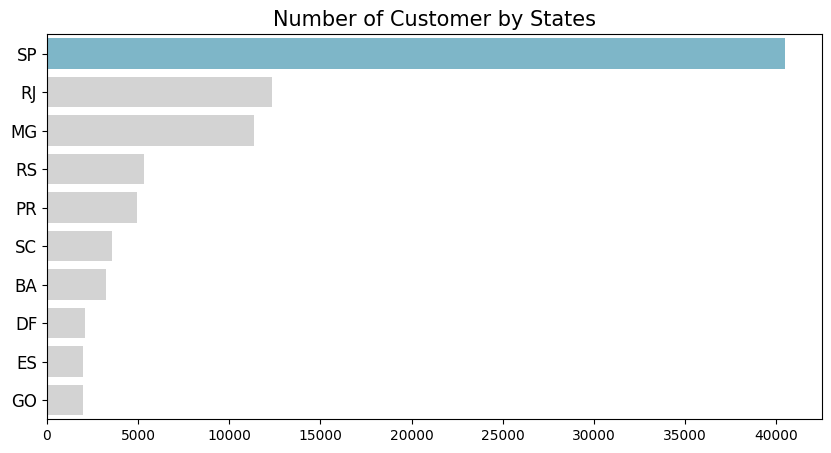

In [109]:
bystate_df = all_df.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sn.barplot(
    x="customer_count",
    y="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=False).head(10),
    palette=colors_
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [110]:
state_customer_counts = all_df.groupby('customer_state')['customer_id'].nunique().reset_index()
state_customer_counts.rename(columns={'customer_id': 'customer_count'}, inplace=True)

top_5_states = state_customer_counts.sort_values('customer_count', ascending=False).head(5)
total_customers = all_df['customer_id'].nunique()

for index, row in top_5_states.iterrows():
    state = row['customer_state']
    customer_count = row['customer_count']
    percentage = (customer_count / total_customers) * 100
    print(f"Percentage of customers in {state}: {percentage:.2f}%")

Percentage of customers in SP: 41.97%
Percentage of customers in RJ: 12.80%
Percentage of customers in MG: 11.77%
Percentage of customers in RS: 5.54%
Percentage of customers in PR: 5.10%


<ipython-input-111-a98e31673013>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(


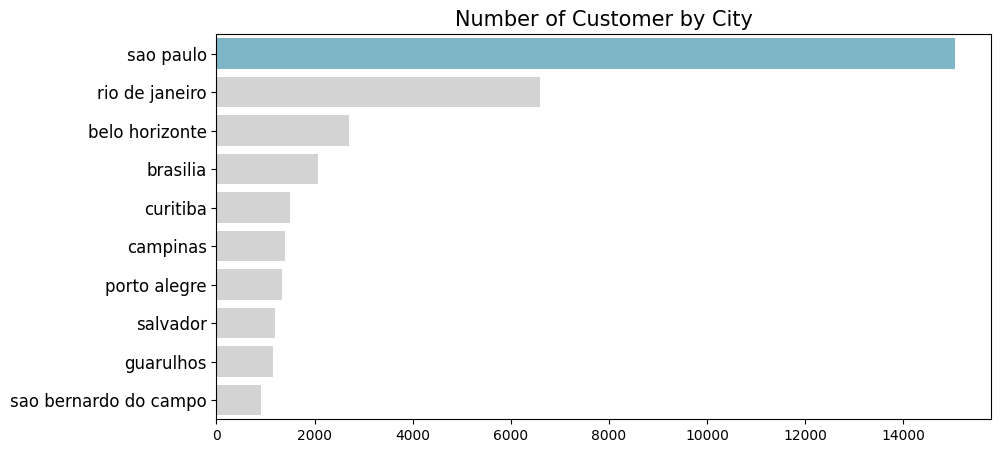

In [111]:
bycity_df = all_df.groupby(by="customer_city").customer_id.nunique().reset_index()
bycity_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bycity_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sn.barplot(
    x="customer_count",
    y="customer_city",
    data=bycity_df.sort_values(by="customer_count", ascending=False).head(10),
    palette=colors_
)
plt.title("Number of Customer by City", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [112]:
city_customer_counts = all_df.groupby('customer_city')['customer_id'].nunique().reset_index()
city_customer_counts.rename(columns={'customer_id': 'customer_count'}, inplace=True)

top_5_cities = city_customer_counts.sort_values('customer_count', ascending=False).head(5)
total_customers = all_df['customer_id'].nunique()

for index, row in top_5_cities.iterrows():
    city = row['customer_city']
    customer_count = row['customer_count']
    percentage = (customer_count / total_customers) * 100
    print(f"Percentage of customers in {city}: {percentage:.2f}%")

Percentage of customers in sao paulo: 15.60%
Percentage of customers in rio de janeiro: 6.85%
Percentage of customers in belo horizonte: 2.80%
Percentage of customers in brasilia: 2.15%
Percentage of customers in curitiba: 1.54%


**Insight:**
- Revenue perbulan terbesar dihasilkan pada bulan november 2017 sebesar 1559605.04 RBL
- Jumlah transaksi penjualan terbanyak dihasilkan pada bulan november 2017 sebesar 8890 transaksi
- Produk kategori terbanyak terjual adalah bed_bath_table sebesar 11988
- Produk kategori tersedikit terjual adalah security_and_services sebesar 2

## Analisis Lanjutan (Opsional)
### Pertanyaan 4, 5, 6:
- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?


Mengelompokkan data rfm_df untuk menampilakn recency, frequency, dan monetary

In [113]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique",
    "payment_value": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,1,114.74,288
1,000161a058600d5901f007fab4c27140,2017-07-16,1,67.41,409
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,1,195.42,547
3,0002414f95344307404f0ace7a26f1d5,2017-08-16,1,179.35,378
4,000379cdec625522490c315e70c7a9fb,2018-04-02,1,107.01,149


In [114]:
rfm_df.describe(include="all")

,customer_id,max_order_timestamp,frequency,monetary,recency
count,96461,96461,96461.0,96461.000000,96461.000000
unique,96461,612,NaN,NaN,NaN
top,00012a2ce6f8dcda20d059ce98491703,2017-11-24,NaN,NaN,NaN
freq,1,1147,NaN,NaN,NaN
mean,NaN,NaN,1.0,206.085147,239.640953
std,NaN,NaN,0.0,624.803845,152.830809
min,NaN,NaN,1.0,0.000000,0.000000
25%,NaN,NaN,1.0,62.830000,116.000000
50%,NaN,NaN,1.0,110.020000,221.000000
75%,NaN,NaN,1.0,196.100000,349.000000


In [115]:
filtered_rfm_df = rfm_df[rfm_df['recency'] == 0]
filtered_rfm_df[['customer_id', 'recency', 'max_order_timestamp', 'monetary']]

,customer_id,recency,max_order_timestamp,monetary
6218,10a79ef2783cae3d8d678e85fde235ac,0,2018-08-29,14.29
25778,448945bc713d98b6726e82eda6249b9e,0,2018-08-29,2486.25
27628,496630b6740bcca28fce9ba50d8a26ef,0,2018-08-29,33.23
31659,54365416b7ef5599f54a6c7821d5d290,0,2018-08-29,106.95
32566,56b1ac2855cc6d7950b4ffa6a9b41b0d,0,2018-08-29,119.42
41375,6e353700bc7bcdf6ebc15d6de16d7002,0,2018-08-29,61.29
51751,898b7fee99c4e42170ab69ba59be0a8b,0,2018-08-29,93.75
69867,b8c19e70d00f6927388e4f31c923d785,0,2018-08-29,178.25
74448,c4c66f47534e09a03fc7a878a9eda5ea,0,2018-08-29,74.21
86192,e450a297a7bc6839ceb0cf1a2377fa02,0,2018-08-29,73.10


Mengurutkan data berdasarkan recency terendah

In [116]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_id,max_order_timestamp,frequency,monetary,recency
86865,e60df9449653a95af4549bbfcb18a6eb,2018-08-29,1,1021.92,0
25778,448945bc713d98b6726e82eda6249b9e,2018-08-29,1,2486.25,0
6218,10a79ef2783cae3d8d678e85fde235ac,2018-08-29,1,14.29,0
86192,e450a297a7bc6839ceb0cf1a2377fa02,2018-08-29,1,73.10,0
27628,496630b6740bcca28fce9ba50d8a26ef,2018-08-29,1,33.23,0


Mengurutkan data berdasarkan frequency terbanyak, namun semua frequency pada data ini hanya 1 kali saja

In [117]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,1,114.74,288
64304,aa5e0a0c36015d39de864189a2b00b09,2018-08-14,1,99.33,15
64313,aa6190994371836fc1d4596edd827abd,2017-12-28,1,250.40,244
64312,aa606152f23a5fa9ba3d0b87f7a492e8,2018-01-16,1,72.67,225
64311,aa601b3c45980c0918042d5ca7a25054,2018-03-15,1,58.28,167


Mengurutkan data berdasarkan Monetary terbesar yang dikeluarkan

In [118]:
rfm_df.sort_values(by="monetary", ascending=False).head(5)

,customer_id,max_order_timestamp,frequency,monetary,recency
8291,1617b1357756262bfa56ab541c47bc16,2017-09-29,1,109312.64,334
71670,bd5d39761aa56689a265d95d8d32b8be,2017-08-23,1,45256.00,371
71920,be1b70680b9f9694d8c70f41fa3dc92b,2018-02-22,1,44048.00,188
2007,05455dfa7cd02f13d132aa7a6a9729c6,2017-11-24,1,36489.24,278
12042,1ff773612ab8934db89fd5afa8afe506,2018-04-19,1,30186.00,132


Membuat visualisasi dengan barchart agar informasi lebih mudah dibaca dan lebih menarik. Visualisasi yang dihasilkan terdapat 3 yaitu untuk menampilkan urutan customer dengan recency terendah, frequency terbanyak, dan monetary terbesar yang dikeluarkan oleh customer. Data rfm ini bisa digunakan untuk mengelompokkan customer dengan memberikan skor kepada mereka lalu mengelompokkan menjadi beberapa kelompok untuk kepentingan bisnis perusahaan agar lebih tepat sasaran strategi yang digunakan 

<ipython-input-119-0ae645983aeb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(y="recency", x="customer_id_short", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-119-0ae645983aeb>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(y="frequency", x="customer_id_short", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-119-0ae645983aeb>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(y="monetary", x="customer_id_short", data=rfm_d

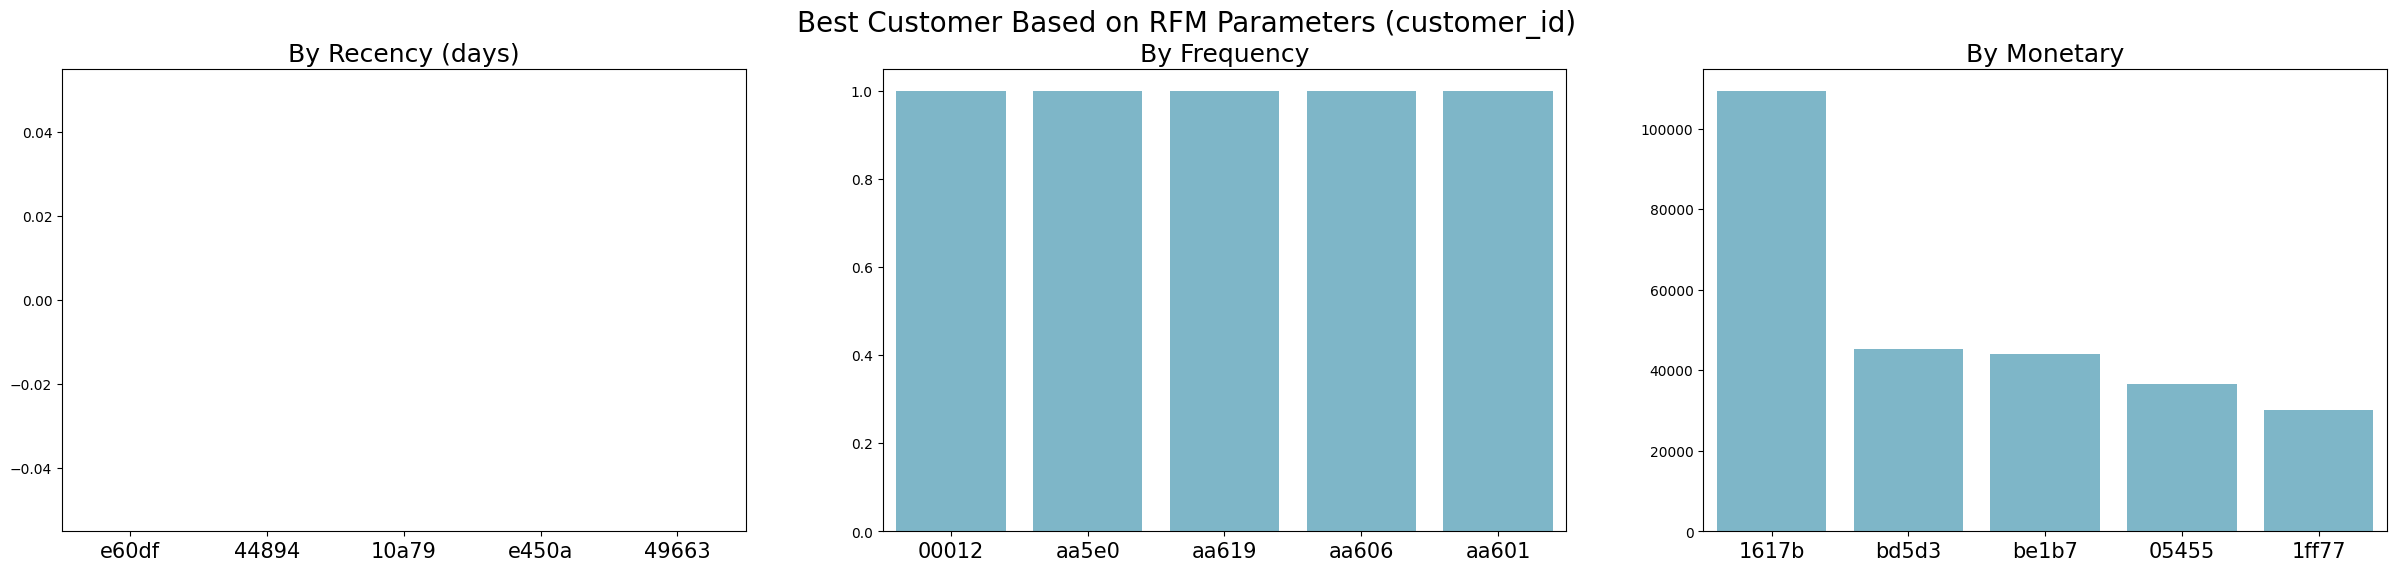

In [119]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

rfm_df['customer_id_short'] = rfm_df['customer_id'].str[:5]

sn.barplot(y="recency", x="customer_id_short", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sn.barplot(y="frequency", x="customer_id_short", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sn.barplot(y="monetary", x="customer_id_short", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()


## Conclusion

- Conclution pertanyaan 1:
Performa penjualan dan revenue dari tahun 2016 sampai 2018 selalu mengalami peningkatan tiap tahunnya

- Conclution pertanyaan 2: Produk dalam kategori seperti bed_bath_table, healty_beauty, sports_leisure, furniture_decor, computers_accessories, dll merupakan produk yang paling banyak diminati oleh customer. Kemudian produk dalam kategori security_and_services, fashion_childrens_clothes, cds_dvds_musicals, la_cuisine, arts_and_craftmanship merupakan produk yang kurang diminati customer dalam e-commerce ini

- Conclution pertanyaan 3: sebagian besar customer berasal dari negara bagian SP sebanyak 41.97% dan paling banyak berasal dari kota Sao Paulo sebanyak 15.60%

- Conclution pertanyaan 4: Terdapat 11 customer yang melakukan transaksi pada 29 agustus 2018 yang merupakan waktu paling akhir transaksi

- Conclution pertanyaan 5: Semua customer paling banyak melakukan transaksi hanya 1 kali saja

- Conclution pertanyaan 6: Customer paling banyak memberikan uang adalah dengan customer dengan customer_id (1617b...) sebesar 109312.64	RBL


In [120]:
all_df.to_csv("all_data.csv", index=False)